# Stock Forecasting using PyFlux

### VAR models

https://github.com/RJT1990/pyflux

In [1]:
# Data manipulation
# ==============================================================================
import pandas as pd
import numpy as np
import datetime

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modelling and Forecasting
# ==============================================================================
import pyflux as pf

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

# Yahoo finance is used to fetch data 
# ==============================================================================
import yfinance as yf
yf.pdr_override()

In [2]:
symbols = ['AMD', 'MSFT','GOOGL','AAPL']
start = '2020-01-01'
end = '2022-07-20'

df = yf.download(symbols,start,end)['Adj Close']


[*********************100%***********************]  4 of 4 completed


In [3]:
df.head()

,AAPL,AMD,GOOGL,MSFT
Date,,,,
2020-01-02,73.683578,49.099998,68.433998,156.924393
2020-01-03,72.967216,48.599998,68.075996,154.970413
2020-01-06,73.548630,48.389999,69.890503,155.370956
2020-01-07,73.202728,48.250000,69.755501,153.954361
2020-01-08,74.380287,47.830002,70.251999,156.406570


In [4]:
df.tail()

,AAPL,AMD,GOOGL,MSFT
Date,,,,
2022-07-13,145.288193,77.519997,111.353500,252.720001
2022-07-14,148.264053,78.599998,110.367500,254.080002
2022-07-15,149.961700,81.110001,111.777496,256.720001
2022-07-18,146.865997,81.430000,109.029999,254.250000
2022-07-19,150.790543,85.879997,113.809998,259.529999


In [5]:
prices = np.log(df)

In [6]:
model = pf.VAR(data=prices, lags=2, integ=1)
x = model.fit()
x.summary()

VAR(2)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced AAPL,Differenced AMD,Di Method: OLS                                       
Start Date: 2020-01-06 00:00:00                         Log Likelihood: nan                               
End Date: 2022-07-19 00:00:00                           AIC: nan                                          
Number of observations: 638                             BIC: nan                                          
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced AAPL Constant                0.0013     0.0009     1.4364   0.1509   (-0.0005 | 0.0031)       
Differenced AAPL AR(1)               

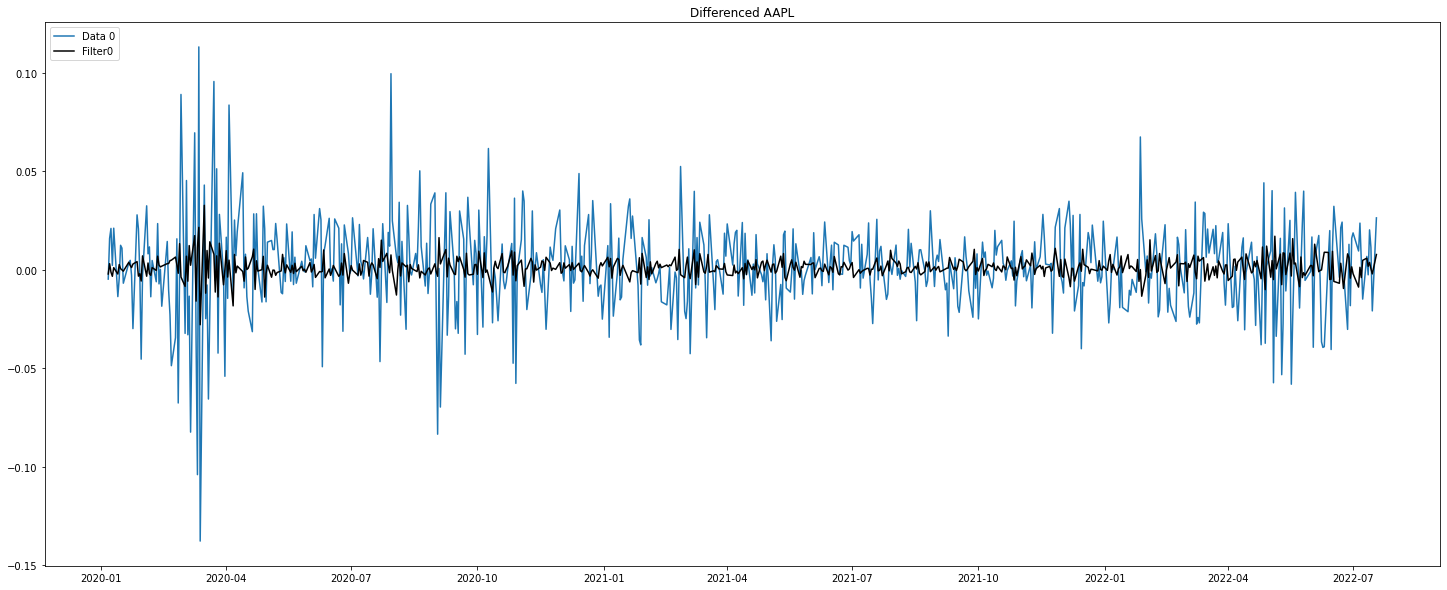

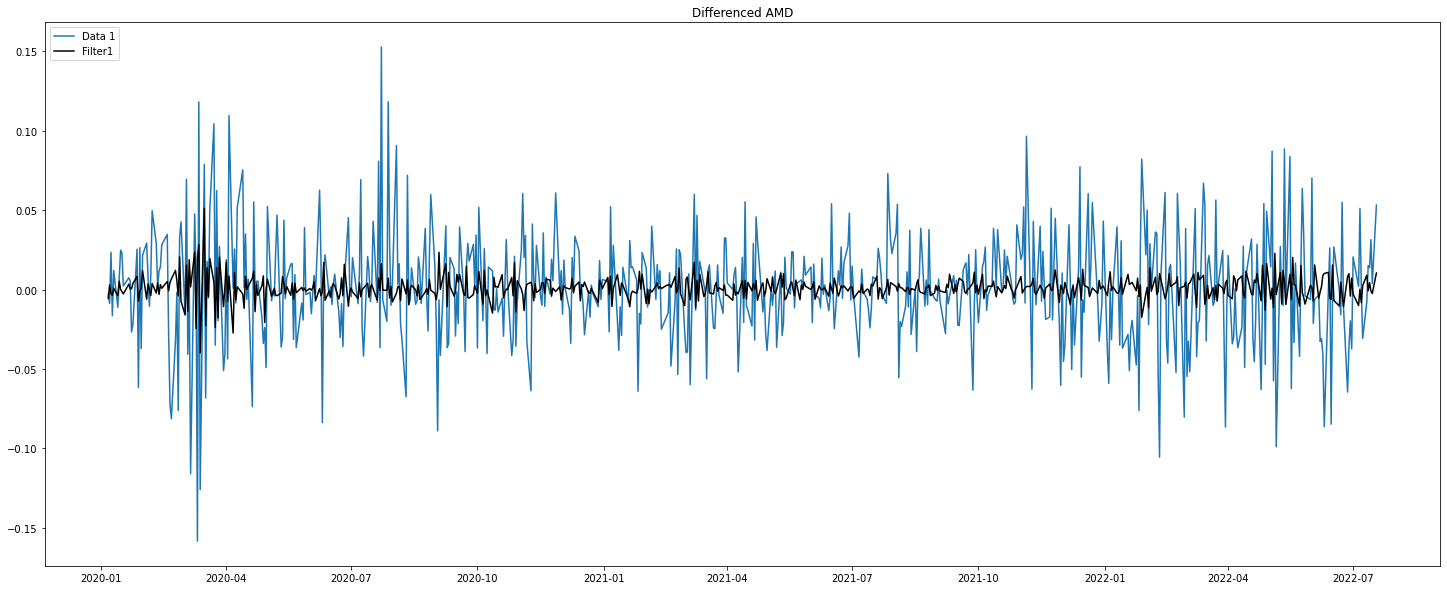

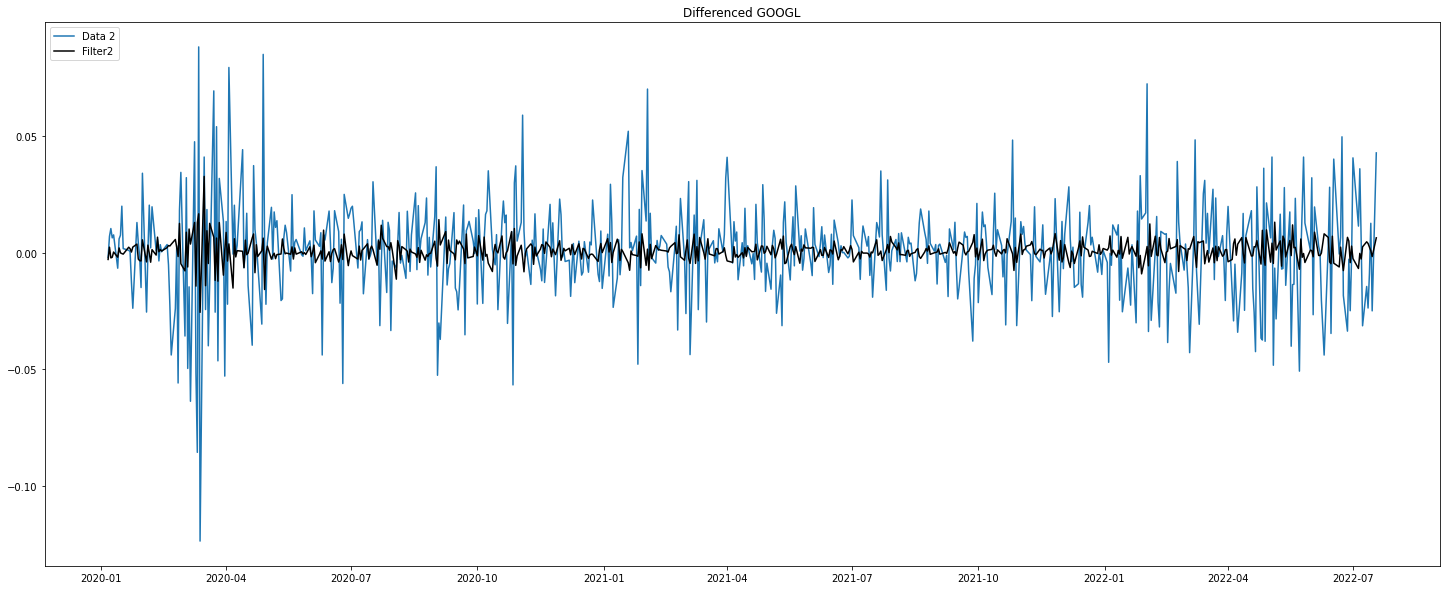

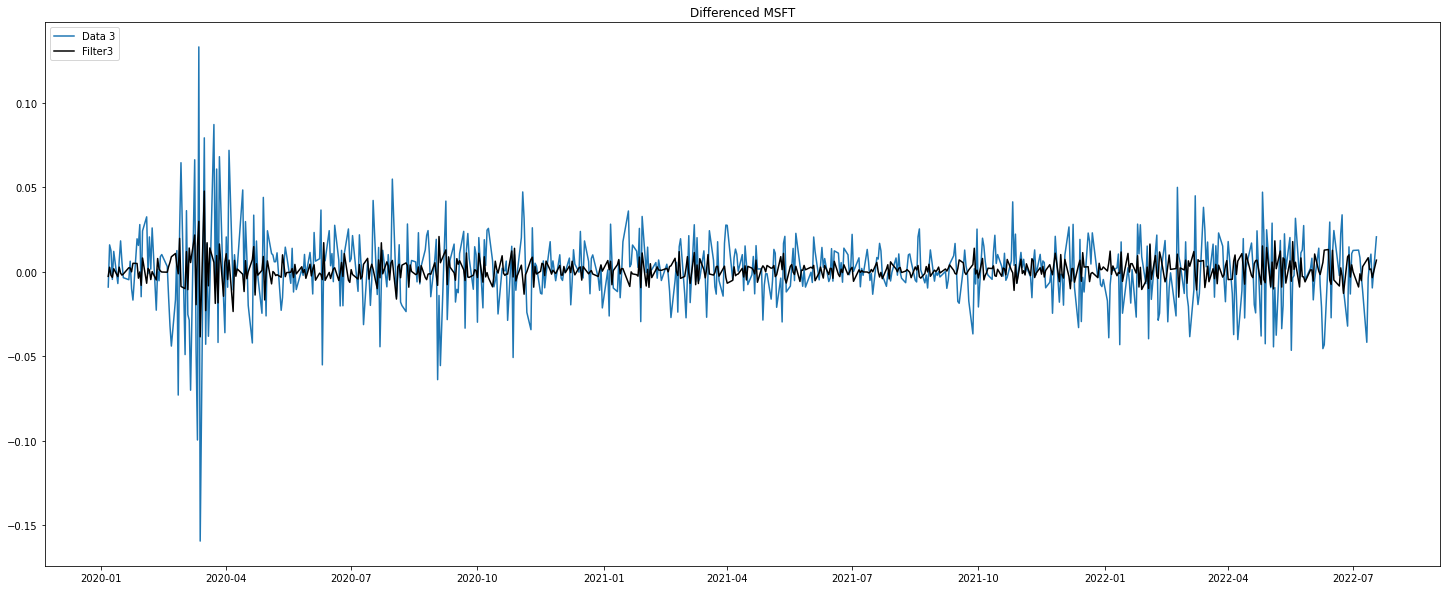

In [7]:
model.plot_fit(figsize=(25,10))

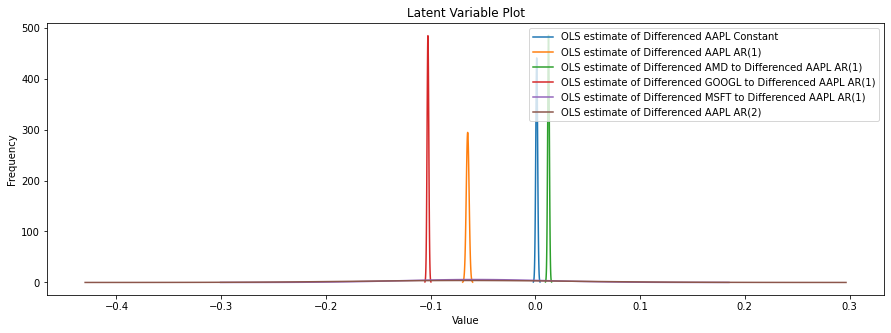

In [8]:
model.plot_z(list(range(0,6)),figsize=(15,5))

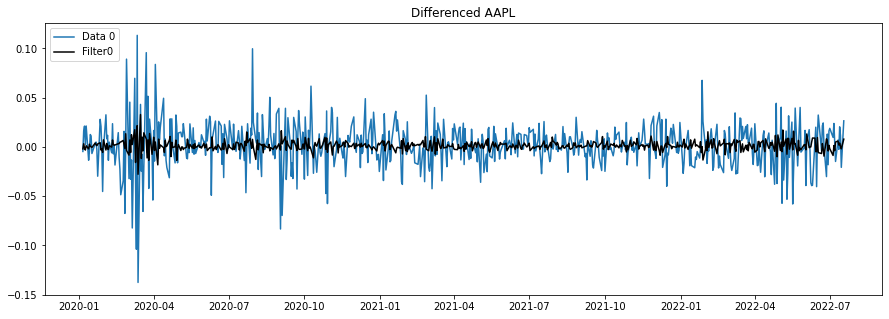

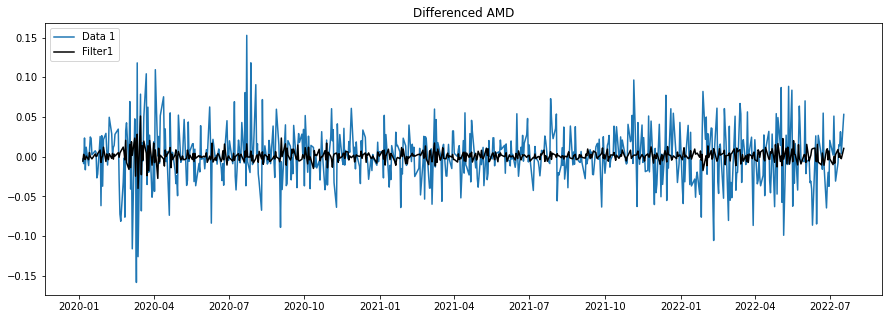

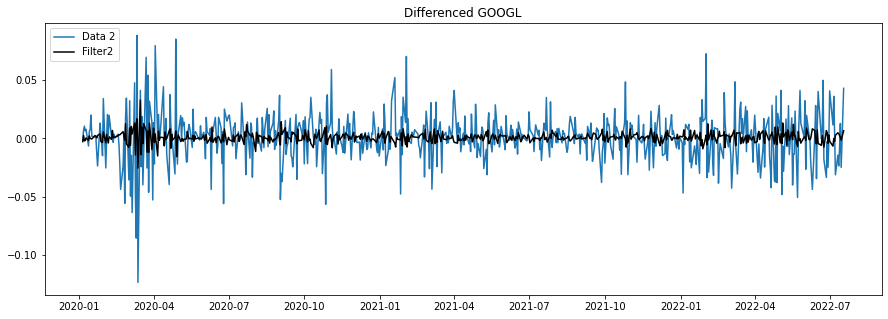

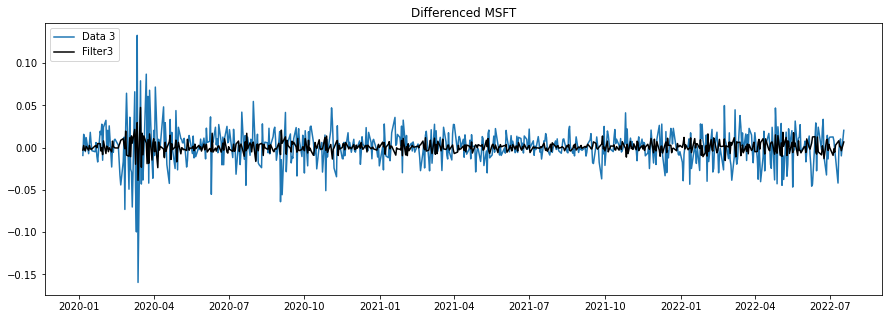

In [9]:
model.plot_fit(figsize=(15,5))

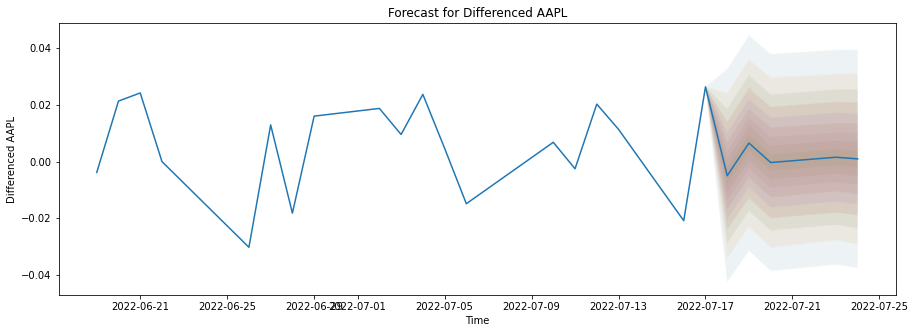

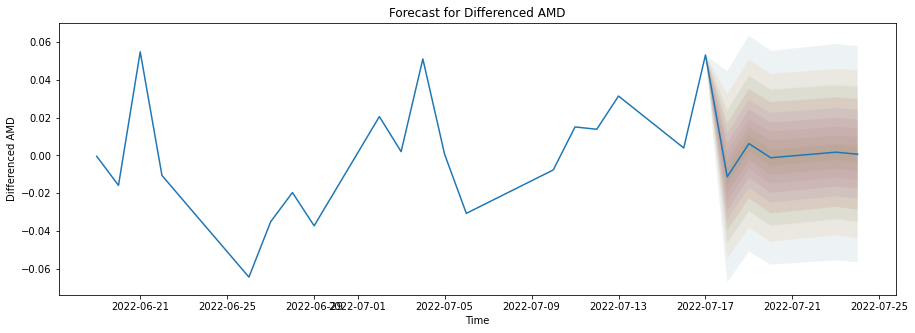

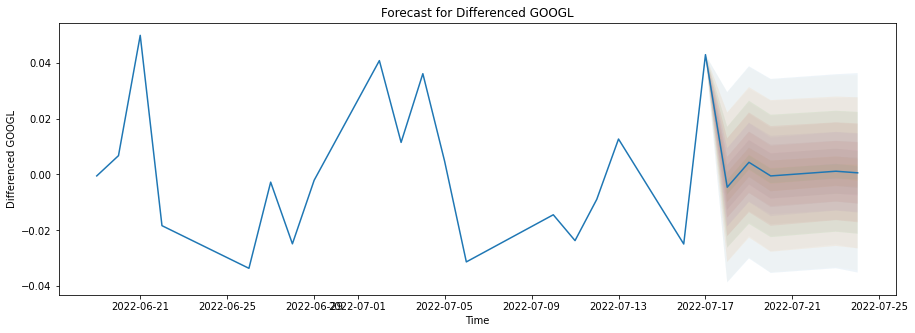

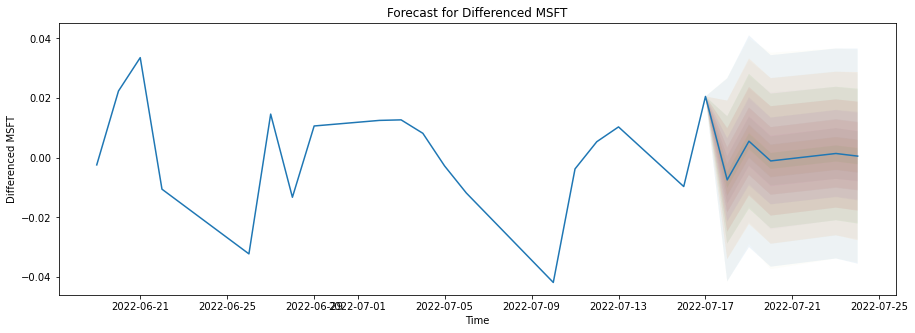

In [10]:
model.plot_predict(past_values=19, h=5, figsize=(15,5))

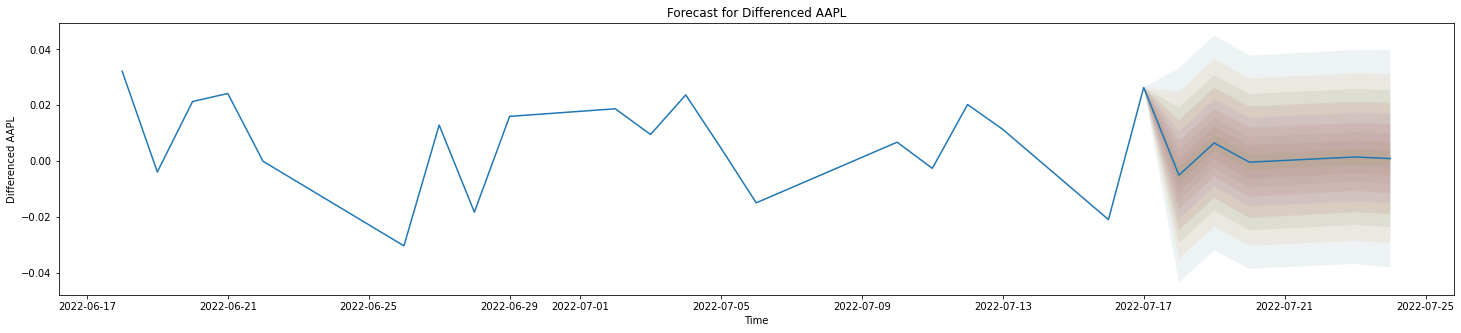

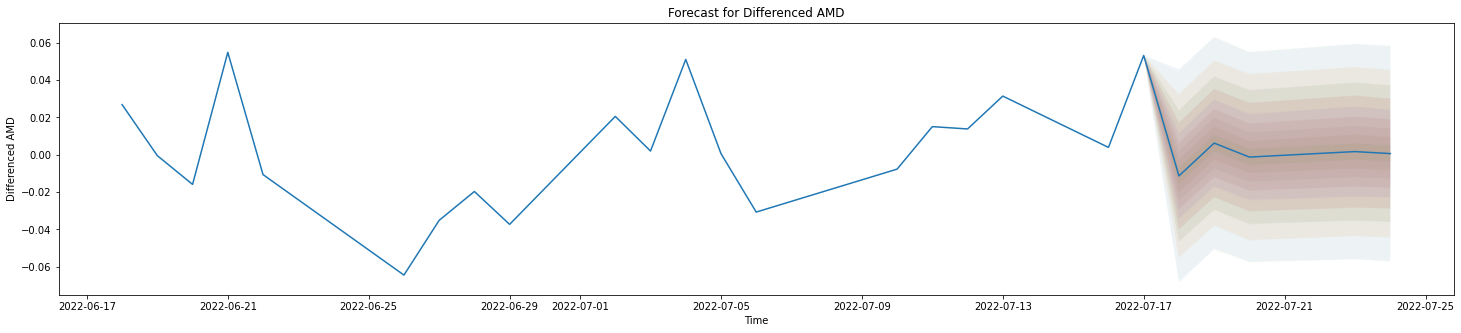

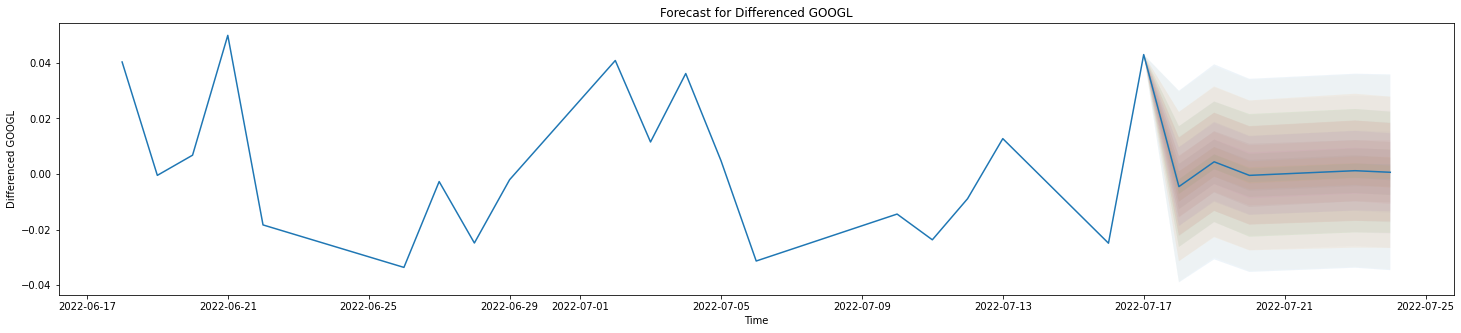

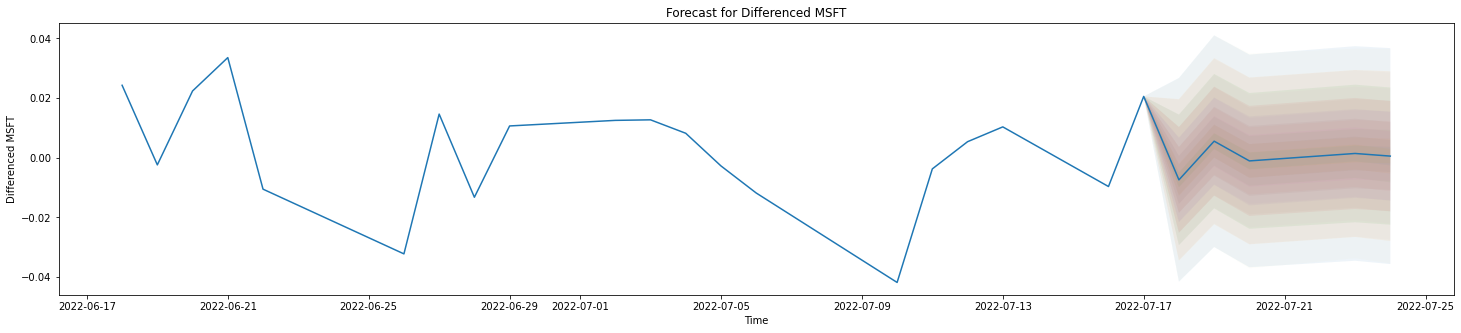

In [11]:
model.plot_predict(h=5,figsize=(25,5))